In [2]:
import scipy
import numpy
import sklearn
import statsmodels


import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

sns.set_palette("deep", desat=0.6)
sns.set_context(rc={"figure.figsize": (8,4)})


The problem is to Forecast the number of Accidents due to Driver distraction in NYC

In [3]:
dfAccidents = pd.read_csv('~/DATA/NYPD_Motor_Vehicle_Collisions.csv', low_memory=False)


In [4]:
dfAccidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226374 entries, 0 to 1226373
Data columns (total 29 columns):
DATE                             1226374 non-null object
TIME                             1226374 non-null object
BOROUGH                          876463 non-null object
ZIP CODE                         876369 non-null object
LATITUDE                         1010457 non-null float64
LONGITUDE                        1010457 non-null float64
LOCATION                         1010457 non-null object
ON STREET NAME                   986184 non-null object
CROSS STREET NAME                918987 non-null object
OFF STREET NAME                  192420 non-null object
NUMBER OF PERSONS INJURED        1226374 non-null int64
NUMBER OF PERSONS KILLED         1226374 non-null int64
NUMBER OF PEDESTRIANS INJURED    1226374 non-null int64
NUMBER OF PEDESTRIANS KILLED     1226374 non-null int64
NUMBER OF CYCLIST INJURED        1226374 non-null int64
NUMBER OF CYCLIST KILLED         1226374

In [5]:
# To convert pandas dataframe to pandas series
#series1=df.iloc[0,:]
#type(series1)

In [6]:
dfAccidents['DATE'] =pd.to_datetime(dfAccidents['DATE'])

In [7]:
dfAccidents['year'], dfAccidents['month'],dfAccidents['DAY_OF_WEEK']= dfAccidents['DATE'].apply(lambda x: x.year), dfAccidents['DATE'].apply(lambda x: x.month), dfAccidents['DATE'].apply(lambda x: x.weekday()) 


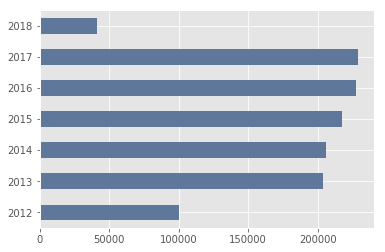

In [8]:
CountStatus = pd.value_counts(dfAccidents['year'].values, sort=False)
CountStatus.plot.barh()

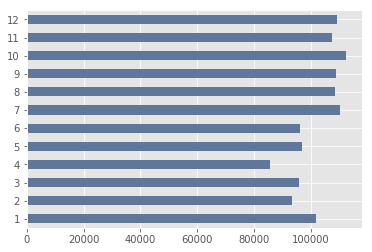

In [9]:
pd.value_counts(dfAccidents['month'].values, sort=False).plot.barh()

In [10]:
dfBOROUGH = dfAccidents.groupby(['BOROUGH', 'year']).size().unstack()
dfBOROUGH.head(6)

year,2012,2013,2014,2015,2016,2017,2018
BOROUGH,,,,,,,
BRONX,9510,19768,19687,21252,21703,21187,4148
BROOKLYN,23302,47017,47758,50843,47698,44633,8375
MANHATTAN,20719,41578,41262,42518,36766,31488,5643
QUEENS,19139,39310,41019,42484,41556,38378,7535
STATEN ISLAND,4902,8295,6614,6344,6720,6212,1100


Get All Contributing factors and saved them in a CSV file. These factors are binned into separate category

In [11]:
df_CONTRIBUTINGFACTORs = pd.read_csv('~/Documents/GitHub/DATA698/Data/CONTRIBUTINGFACTORs.csv',)

In [12]:
dfAccidents['factorVeh1'] = dfAccidents['CONTRIBUTING FACTOR VEHICLE 1'].map(df_CONTRIBUTINGFACTORs.set_index('Contributing Factors')['Factors'])
dfAccidents['factorVeh2'] = dfAccidents['CONTRIBUTING FACTOR VEHICLE 2'].map(df_CONTRIBUTINGFACTORs.set_index('Contributing Factors')['Factors'])
dfAccidents['factorVeh3'] = dfAccidents['CONTRIBUTING FACTOR VEHICLE 3'].map(df_CONTRIBUTINGFACTORs.set_index('Contributing Factors')['Factors'])
dfAccidents['factorVeh4'] = dfAccidents['CONTRIBUTING FACTOR VEHICLE 4'].map(df_CONTRIBUTINGFACTORs.set_index('Contributing Factors')['Factors'])
dfAccidents['factorVeh5'] = dfAccidents['CONTRIBUTING FACTOR VEHICLE 5'].map(df_CONTRIBUTINGFACTORs.set_index('Contributing Factors')['Factors'])



In [13]:
df_CONTRIBUTING_FACTOR =dfAccidents[['year','factorVeh1','factorVeh2','factorVeh3','factorVeh4','factorVeh5']]

In [14]:
factors =df_CONTRIBUTINGFACTORs['Factors']
factors_lst =factors[1:].unique()

In [15]:
df_CONTRIBUTING_FACTOR.apply(pd.value_counts).fillna(0)

C:\Users\test\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\test\Anaconda3\lib\site-packages\pandas\core\frame.py:5539: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


,year,factorVeh1,factorVeh2,factorVeh3,factorVeh4,factorVeh5
2017,229290.0,0.0,0.0,0.0,0.0,0.0
2016,227813.0,0.0,0.0,0.0,0.0,0.0
2015,217663.0,0.0,0.0,0.0,0.0,0.0
2014,206023.0,0.0,0.0,0.0,0.0,0.0
2013,203722.0,0.0,0.0,0.0,0.0,0.0
2012,100537.0,0.0,0.0,0.0,0.0,0.0
2018,41326.0,0.0,0.0,0.0,0.0,0.0
Unspecified,0.0,584038.0,894640.0,72702.0,15758.0,3928.0
Driver Distraction,0.0,291170.0,78643.0,2856.0,507.0,101.0
Improper Driving,0.0,112107.0,19628.0,805.0,169.0,27.0


### Driver Distraction,Improper Driving and violaton of law are the main factors causing accidents

In [16]:
dfAccidents['MonthBegin'] =dfAccidents['DATE'] + pd.offsets.MonthBegin(-1)

### Let us split the dataset - Persons injured in NYC Road Accidents before and after 2017

In [17]:
dfAccidents_before2017 = dfAccidents.loc[dfAccidents['MonthBegin'].dt.year < 2017]   # Train data 
dfAccidents_after2017   =dfAccidents.loc[dfAccidents['MonthBegin'].dt.year >= 2017]  # Test Data

In [18]:
print('train Dataset %d, Test dataset %d' % (len(dfAccidents_before2017), len(dfAccidents_after2017)))

train Dataset 956241, Test dataset 270133


### Brooklyn has highest number of accidents 
#### So let us subset our dataset just for Brooklyn and Accidents caused by 'Driver Distraction'

In [19]:

dfAccidents_before2017_DD = dfAccidents_before2017.loc[(dfAccidents_before2017['factorVeh1'] == 'Driver Distraction')| (dfAccidents_before2017['factorVeh2'] == 'Driver Distraction')|(dfAccidents_before2017['factorVeh3'] == 'Driver Distraction')|(dfAccidents_before2017['factorVeh4'] == 'Driver Distraction')|(dfAccidents_before2017['factorVeh5'] == 'Driver Distraction')]
dfAccidents_after2017_DD = dfAccidents_after2017.loc[(dfAccidents_after2017['factorVeh1'] == 'Driver Distraction')| (dfAccidents_after2017['factorVeh2'] == 'Driver Distraction')|(dfAccidents_after2017['factorVeh3'] == 'Driver Distraction')|(dfAccidents_after2017['factorVeh4'] == 'Driver Distraction')|(dfAccidents_after2017['factorVeh5'] == 'Driver Distraction')]
   

In [20]:
print('train Dataset %d, Test dataset %d' % (len(dfAccidents_before2017_DD), len(dfAccidents_after2017_DD)))

train Dataset 237333, Test dataset 69642


In [21]:
df_injbefore2017 = dfAccidents_before2017_DD[['DATE','MonthBegin', 'BOROUGH','NUMBER OF PERSONS INJURED']].copy()
df_injafter2017 =dfAccidents_after2017_DD[['DATE','MonthBegin', 'BOROUGH','NUMBER OF PERSONS INJURED']].copy()

In [22]:
df_injbefore2017_BROOKLYN =df_injbefore2017.loc[(df_injbefore2017['BOROUGH']=='BROOKLYN')] 
df_injafter2017_BROOKLYN =df_injafter2017.loc[df_injafter2017['BOROUGH']=='BROOKLYN'] 

In [23]:
df_injbefore2017_BROOKLYN = df_injbefore2017_BROOKLYN[pd.notnull(df_injbefore2017_BROOKLYN['NUMBER OF PERSONS INJURED'])]
print('train Dataset %d, Test dataset %d' % (len(df_injbefore2017_BROOKLYN), len(df_injbefore2017_BROOKLYN)))

train Dataset 43774, Test dataset 43774


In [24]:
print('train Dataset %d, Test dataset %d' % (len(df_injbefore2017_BROOKLYN), len(df_injafter2017_BROOKLYN)))

train Dataset 43774, Test dataset 11984


In [25]:
df_injbefore2017_BROOKLYN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43774 entries, 270252 to 1226336
Data columns (total 4 columns):
DATE                         43774 non-null datetime64[ns]
MonthBegin                   43774 non-null datetime64[ns]
BOROUGH                      43774 non-null object
NUMBER OF PERSONS INJURED    43774 non-null int64
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 1.7+ MB


In [26]:

df_inj1  =df_injbefore2017_BROOKLYN[['MonthBegin','NUMBER OF PERSONS INJURED']].copy()
df_inj2  =df_injafter2017_BROOKLYN[['MonthBegin','NUMBER OF PERSONS INJURED']].copy()

df_inj1 =df_inj1.dropna()
df_inj2 =df_inj2.dropna()
df_inj1  = df_inj1.set_index('MonthBegin')
df_inj2  = df_inj2.set_index('MonthBegin')

In [27]:
df_count1=df_inj1.groupby('MonthBegin').agg(['count'])
df_count2=df_inj2.groupby('MonthBegin').agg(['count'])
print('train Dataset %d, Test dataset %d' % (len(df_count1), len(df_count2)))

train Dataset 55, Test dataset 15


In [28]:
#df_count1


In [29]:
# To convert pandas dataframe to pandas series
series1=df_count1.iloc[0,:]
series2=df_count2.iloc[0,:]
type(series2)

pandas.core.series.Series

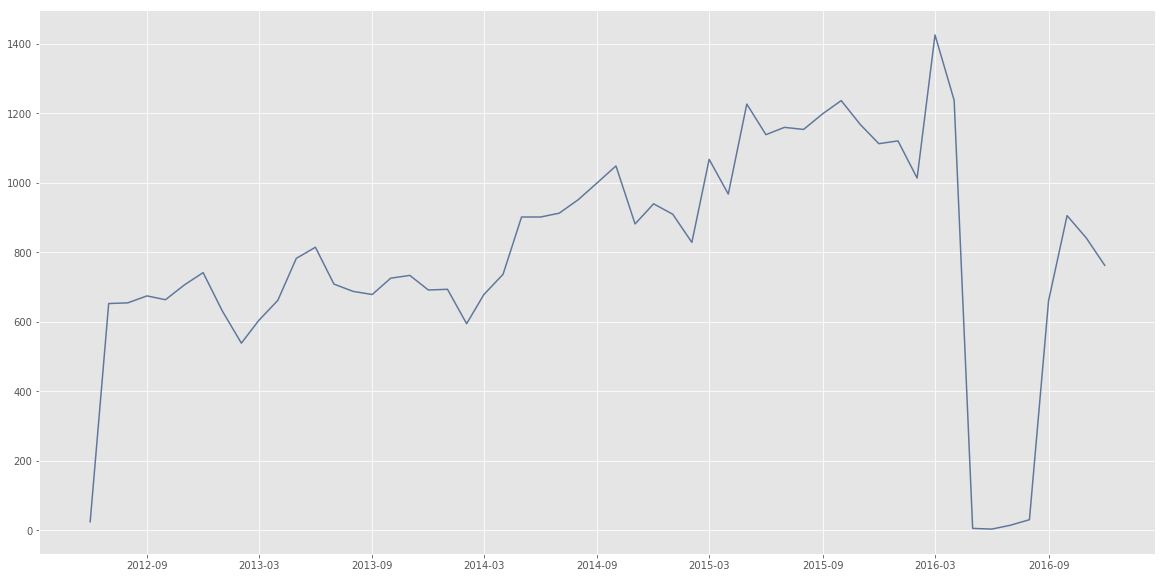

In [31]:
#plot data
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df_count1)

### Time series Analysis of NYC Accident Data- Brooklyn

### Check whether the Time series is Stationary

The Time Series is said to be Stationary if the statistical properties of it such as mean and variance remain constant over time over time. 

Here we use Dickey-Fuller Test to see whether the TS is Stationary or not:  The test results comprise of a Test Statistic and some Critical Values for different confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, then the series is stationary.

In [42]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import sys
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean() #pd.rolling_mean(timeseries, window=12)    
    rolstd = timeseries.rolling(window=12,center=False).std() #pd.rolling_std(timeseries, window=12)
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
  


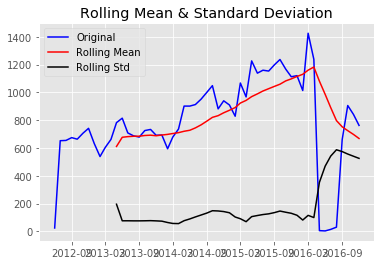

Results of Dickey-Fuller Test:
Test Statistic                 -3.045017
p-value                         0.030899
#Lags Used                      1.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


In [43]:
test_stationarity(df_count1)

Although the variation in variance is small, mean is changing with time and this is not a stationary series.


### Make Time Series Stationary

#### Estimating & Eliminating Trend

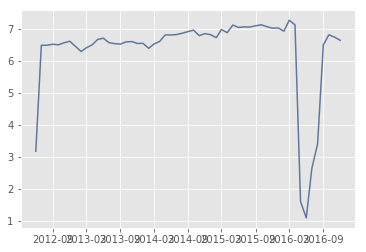

In [44]:
ts_log = numpy.log(df_count1)
plt.plot(ts_log)

### Moving Average

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

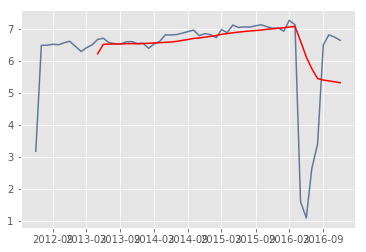

In [45]:
moving_avg = ts_log.rolling(window=12,center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

Notice the first 11 being Nan. Lets drop these NaN values and check the plots to test stationarity.

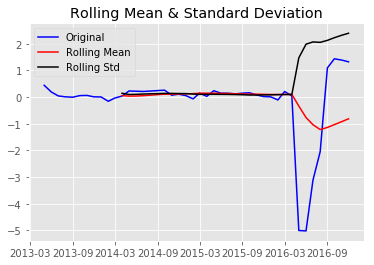

Results of Dickey-Fuller Test:
Test Statistic                 -3.467229
p-value                         0.008870
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [47]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

Here there is no specific trend and Test Statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

### Elimination Trend and Seasonality

1. Differencing – is a technique which takes the differece with a particular time lag

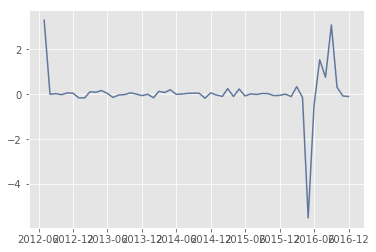

In [48]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

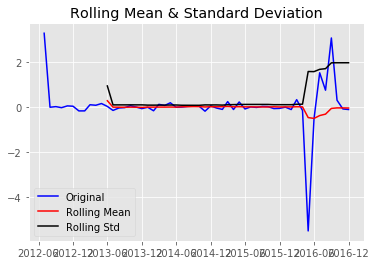

Results of Dickey-Fuller Test:
Test Statistic                 -4.242286
p-value                         0.000558
#Lags Used                      5.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [52]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In this case we see that the mean and variance have small variations with time. Also, the Dickey-Fuller Test Statistic is less than the 1% critical value, thus the TS is stationary with 99% confidence.

##  Forecasting a Time Series

We use ARIMA model to forecast the NYC accidents in Brooklyn Borough. ARIMA stands for 'Auto Regressive Integrated Moving Averages.'
The predictor depend on three parameters: p,d and q.
    
p <- number of auto regressive terms

q <- number of Moving Average terms

d <- number of differences

In order to get p and q we can use acf(auto correlation function) and pacf(partial auto correlation function)

In [53]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [54]:
numpy.warnings.filterwarnings('ignore')
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

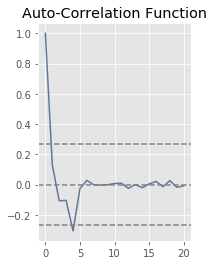

In [55]:
#ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/numpy.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/numpy.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Auto-Correlation Function')


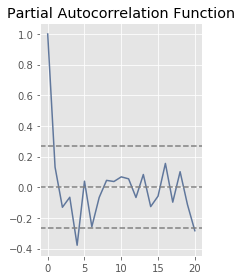

In [56]:
#PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/numpy.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/numpy.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#### Load the ARIMA model:

In [57]:
from statsmodels.tsa.arima_model import ARIMA

The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q). 

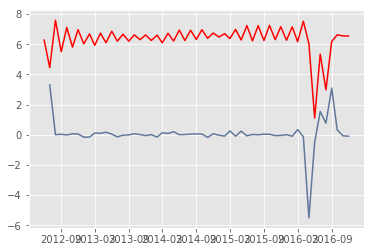

In [103]:
model = ARIMA(ts_log, order=(1,0,1))  
results_AR = model.fit(disp=-1)
ts_log_diff.sub(results_ARIMA.fittedvalues, axis=0)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')

#results_AR.fittedvalues)
#plt.title('RSS: %.4f'% sum( (ts_log_diff.sub(results_ARIMA.fittedvalues, axis=0))**2))

In [107]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

MonthBegin
2012-06-01    6.267194
2012-07-01    4.446363
2012-08-01    7.584768
2012-09-01    5.502175
2012-10-01    7.106979
dtype: float64


In [106]:
#ts_log_diff.sub(results_ARIMA.fittedvalues, axis=0)

In [108]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

MonthBegin
2012-06-01     6.267194
2012-07-01    10.713557
2012-08-01    18.298325
2012-09-01    23.800500
2012-10-01    30.907480
dtype: float64


In [117]:
model_fit =model.fit(disp=0)
print(model_fit.summary())

                                        ARMA Model Results                                        
Dep. Variable:     ('NUMBER OF PERSONS INJURED', 'count')   No. Observations:                   55
Model:                                         ARMA(1, 1)   Log Likelihood                 -73.852
Method:                                           css-mle   S.D. of innovations              0.890
Date:                                    Mon, 30 Apr 2018   AIC                            155.703
Time:                                            16:13:28   BIC                            163.732
Sample:                                        06-01-2012   HQIC                           158.808
                                             - 12-01-2016                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

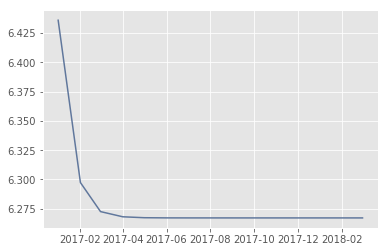

In [123]:
prediction =model_fit.predict('2017-01-01','2018-03-01')
plt.plot(prediction)

In [ ]:
#Remove last row, since March 2018 is incomplete it is better to remove the month of March
df_count3 = df_count2.drop(df_count2.index[len(df_count2)-1])

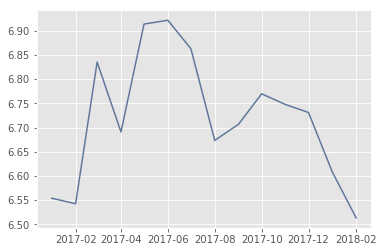

In [129]:
plt.plot(numpy.log(df_count3))

Our model shows there is a gradual decrease in accidents due to DISTRACED DRIVING from 2017 onwards. But in reality there is no trend. 
We will continue our study with other Accident Factors also